In [12]:
# libs
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

In [18]:
maindf=pd.read_csv('rates_1mo.csv')

In [23]:
maindf.head()
# 12-03-2020
# 01-03-2021
# cost 186+12 quotes

,base_currency,quote_currency,start_time,open_time,close_time,open_bid,open_ask,open_midpoint,close_bid,close_ask,close_midpoint,average_bid,average_ask,average_midpoint,high_bid,high_ask,high_midpoint,low_bid,low_ask,low_midpoint
0,USD,CAD,2020-12-03T00:00:00+00:00,2020-12-03T00:00:00+00:00,2020-12-03T23:59:59+00:00,1.29446,1.29446,1.29446,1.29142,1.29142,1.29142,1.29142,1.29142,1.29142,NaN,NaN,NaN,NaN,NaN,NaN
1,USD,CAD,2020-12-04T00:00:00+00:00,2020-12-04T00:00:00+00:00,2020-12-04T23:59:59+00:00,1.29142,1.29142,1.29142,1.28571,1.28571,1.28571,1.28571,1.28571,1.28571,NaN,NaN,NaN,NaN,NaN,NaN
2,USD,CAD,2020-12-05T00:00:00+00:00,2020-12-05T00:00:00+00:00,2020-12-05T23:59:59+00:00,1.28571,1.28571,1.28571,1.28571,1.28571,1.28571,1.28571,1.28571,1.28571,NaN,NaN,NaN,NaN,NaN,NaN
3,USD,CAD,2020-12-06T00:00:00+00:00,2020-12-06T00:00:00+00:00,2020-12-06T23:59:59+00:00,1.28571,1.28571,1.28571,1.28571,1.28571,1.28571,1.28571,1.28571,1.28571,NaN,NaN,NaN,NaN,NaN,NaN
4,USD,CAD,2020-12-07T00:00:00+00:00,2020-12-07T00:00:00+00:00,2020-12-07T23:59:59+00:00,1.28571,1.28571,1.28571,1.28109,1.28109,1.28109,1.28109,1.28109,1.28109,NaN,NaN,NaN,NaN,NaN,NaN


In [21]:
len(maindf)

186

In [40]:
df = maindf[['base_currency', 'quote_currency', 'close_time','average_midpoint']].copy()

In [41]:
df.head()

,base_currency,quote_currency,close_time,average_midpoint
0,USD,CAD,2020-12-03T23:59:59+00:00,1.29142
1,USD,CAD,2020-12-04T23:59:59+00:00,1.28571
2,USD,CAD,2020-12-05T23:59:59+00:00,1.28571
3,USD,CAD,2020-12-06T23:59:59+00:00,1.28571
4,USD,CAD,2020-12-07T23:59:59+00:00,1.28109


In [42]:
df.dtypes

base_currency        object
quote_currency       object
close_time           object
average_midpoint    float64
dtype: object

In [43]:
# convert close_time to date
df['close_time']=pd.to_datetime(df['close_time'])

In [44]:
df.head()

,base_currency,quote_currency,close_time,average_midpoint
0,USD,CAD,2020-12-03 23:59:59+00:00,1.29142
1,USD,CAD,2020-12-04 23:59:59+00:00,1.28571
2,USD,CAD,2020-12-05 23:59:59+00:00,1.28571
3,USD,CAD,2020-12-06 23:59:59+00:00,1.28571
4,USD,CAD,2020-12-07 23:59:59+00:00,1.28109


In [45]:
# plot time
# first set index
# df.set_index('close_time',inplace=True)
df.head()

,base_currency,quote_currency,close_time,average_midpoint
0,USD,CAD,2020-12-03 23:59:59+00:00,1.29142
1,USD,CAD,2020-12-04 23:59:59+00:00,1.28571
2,USD,CAD,2020-12-05 23:59:59+00:00,1.28571
3,USD,CAD,2020-12-06 23:59:59+00:00,1.28571
4,USD,CAD,2020-12-07 23:59:59+00:00,1.28109


In [50]:
# use groupby to plot
# df.set_index('close_time',inplace=True)
# df.groupby('quote_currency')['average_midpoint'].plot()

array([<AxesSubplot:xlabel='close_time'>,
       <AxesSubplot:xlabel='close_time'>,
       <AxesSubplot:xlabel='close_time'>,
       <AxesSubplot:xlabel='close_time'>,
       <AxesSubplot:xlabel='close_time'>,
       <AxesSubplot:xlabel='close_time'>], dtype=object)

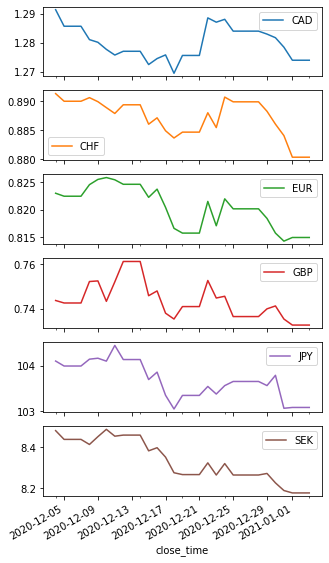

In [48]:
# the above graph is not super helpful because of the scales, so we'll use individual subplots
pd.pivot_table(df.reset_index(),
               index='close_time', columns='quote_currency', values='average_midpoint'
              ).plot(subplots=True,figsize=(5,10))


In [53]:
# introduce dollar index csv
# also need to clean this csv
# and possibly reorder the dates
dxydf=pd.read_csv('dxy.csv')
dxydf=dxydf.dropna()
dxydf.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2020-12-03,91.059998,91.089996,90.510002,90.709999,90.709999,0.0
1,2020-12-04,90.709999,90.870003,90.480003,90.699997,90.699997,0.0
3,2020-12-07,90.809998,91.239998,90.620003,90.790001,90.790001,0.0
4,2020-12-08,90.900002,91.019997,90.750000,90.970001,90.970001,0.0
5,2020-12-09,90.919998,91.199997,90.690002,91.089996,91.089996,0.0


In [64]:
df2 = dxydf[['Date','Adj Close']].copy()

In [65]:
df2['Date']=pd.to_datetime(df2['Date'])
# df2.dtypes

In [69]:
# df2.plot(dfdf2['Adj Close'])
# set the index
df2.set_index('Date',inplace=True)

In [70]:
df2.head()

,Adj Close
Date,
2020-12-03,90.709999
2020-12-04,90.699997
2020-12-07,90.790001
2020-12-08,90.970001
2020-12-09,91.089996


<AxesSubplot:xlabel='Date'>

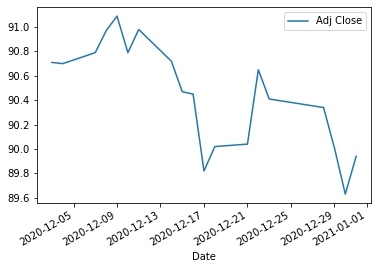

In [71]:
df2.plot()

In [105]:
# best way to really handle everything is through log returns, so lets do this again, but better
# lets recreate our dfs

# basic creation
curr_df=maindf[['base_currency', 'quote_currency', 'close_time','average_midpoint']].copy()
dxy_df=dxydf[['Date','Adj Close']].copy()

In [106]:
# date handling
curr_df['close_time']=pd.to_datetime(curr_df['close_time'])
dxy_df['Date']=pd.to_datetime(dxy_df['Date'])
# set index
curr_df.set_index('close_time',inplace=True)
dxy_df.set_index('Date',inplace=True)

In [107]:
print('curr_df length: ',len(curr_df))
print('dxy_df length: ',len(dxy_df))

curr_df length:  186
dxy_df length:  19


In [108]:
# get some visuals of dfs
curr_df.head()

,base_currency,quote_currency,average_midpoint
close_time,,,
2020-12-03 23:59:59+00:00,USD,CAD,1.29142
2020-12-04 23:59:59+00:00,USD,CAD,1.28571
2020-12-05 23:59:59+00:00,USD,CAD,1.28571
2020-12-06 23:59:59+00:00,USD,CAD,1.28571
2020-12-07 23:59:59+00:00,USD,CAD,1.28109


In [109]:
# visual of df
dxy_df.head()

,Adj Close
Date,
2020-12-03,90.709999
2020-12-04,90.699997
2020-12-07,90.790001
2020-12-08,90.970001
2020-12-09,91.089996


In [110]:
# time for log returns
# formula => ln(current price/orig price)
# using shift for this
dxy_df['log_ret'] = np.log(dxy_df['Adj Close']) - np.log(dxy_df['Adj Close'].shift(1))
# we're going to have NaN for this
# we're going to remove that fella

In [111]:
dxy_df=dxy_df.dropna()
dxy_df.head()

,Adj Close,log_ret
Date,,
2020-12-04,90.699997,-0.000110
2020-12-07,90.790001,0.000992
2020-12-08,90.970001,0.001981
2020-12-09,91.089996,0.001318
2020-12-10,90.790001,-0.003299


In [112]:
print('dxy_df length: ',len(dxy_df))

dxy_df length:  18


In [104]:
# can't do the same thing for our curr df
# because we have different currencies


In [153]:
# separate dfs
# should be 31 midpoints per currency because 186=31*6
# print(curr_df['quote_currency'][3])

cad_df = curr_df[:31]
chf_df = curr_df[31:62]
eur_df = curr_df[62:93]
gbp_df = curr_df[93:124]
jpy_df = curr_df[124:155]
sek_df = curr_df[155:186]
# len(cad_df)
# print(curr_df[124:155])
list_dfs=[cad_df,chf_df,eur_df,gbp_df,jpy_df,sek_df]

In [143]:
# for each in list_dfs:
#     print(each.head())

In [154]:
# do this for all dfs

for each in list_dfs:
    each['log_ret'] = np.log(each['average_midpoint']) - np.log(each['average_midpoint'].shift(1))
#     curr_df.head()


<ipython-input-154-c2a2af5dd09a>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  each['log_ret'] = np.log(each['average_midpoint']) - np.log(each['average_midpoint'].shift(1))


In [159]:
new_listdfs=[]
for each in list_dfs:
    each=each.dropna()
    new_listdfs.append(each)
#     print(each.head())

In [160]:
new_listdfs[4].head()

,base_currency,quote_currency,average_midpoint,log_ret
close_time,,,,
2020-12-04 23:59:59+00:00,USD,JPY,103.989,-0.001048
2020-12-05 23:59:59+00:00,USD,JPY,103.989,0.000000
2020-12-06 23:59:59+00:00,USD,JPY,103.989,0.000000
2020-12-07 23:59:59+00:00,USD,JPY,104.139,0.001441
2020-12-08 23:59:59+00:00,USD,JPY,104.160,0.000202


TypeError: cannot unpack non-iterable int object

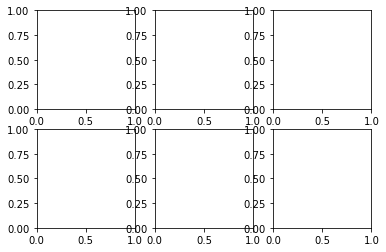

In [163]:
# plt.plot(new_listdfs[4]['log_ret'])
# Create four polar axes and access them through the returned array
# fig, axs = plt.subplots(2, 2, subplot_kw=dict(polar=True))
# axs[0, 0].plot(x, y)
# axs[0, 1].plot(x, y)
# axs[1, 0].plot(x, y)
# axs[1, 1].scatter(x, y)

# graphing time
fig, axs = plt.subplots(2,3)
for x,y in range(6):
    print(x,y)